<a href="https://colab.research.google.com/github/chuquoctuan123456/Credit-Card-Fraud/blob/main/Credit_Card_Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [82]:
from google.colab import files
!pip install -q kaggle

In [83]:
#uploaded = files.upload()

In [84]:
# Chuyển file Kaggle về thư mục kaggle
!mkdir -p -/.kaggle
!cp kaggle.json -/.kaggle

mkdir: invalid option -- '/'
Try 'mkdir --help' for more information.
cp: invalid option -- '/'
Try 'cp --help' for more information.


In [85]:
!kaggle datasets download -d nelgiriyewithana/credit-card-fraud-detection-dataset-2023

Dataset URL: https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023
License(s): other
credit-card-fraud-detection-dataset-2023.zip: Skipping, found more recently modified local copy (use --force to force download)


In [86]:
import zipfile
zip_ref = zipfile.ZipFile("/content/credit-card-fraud-detection-dataset-2023.zip" ,"r")
zip_ref.extractall("/content/data kaggle")
zip_ref.close()

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [88]:
df = pd.read_csv("/content/data kaggle/creditcard_2023.csv")
df.head()

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [90]:
df["Class"].value_counts()

Class
0    284315
1    284315
Name: count, dtype: int64

### Data Pre-processing

In [91]:
df.isnull().sum()

id        0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [92]:
df.duplicated(subset=None, keep='first').unique()


array([False])

###### Dữ liệu không cần phải xử lí gì khi không có missing values và dữ liệu bị duplicates

<Axes: >

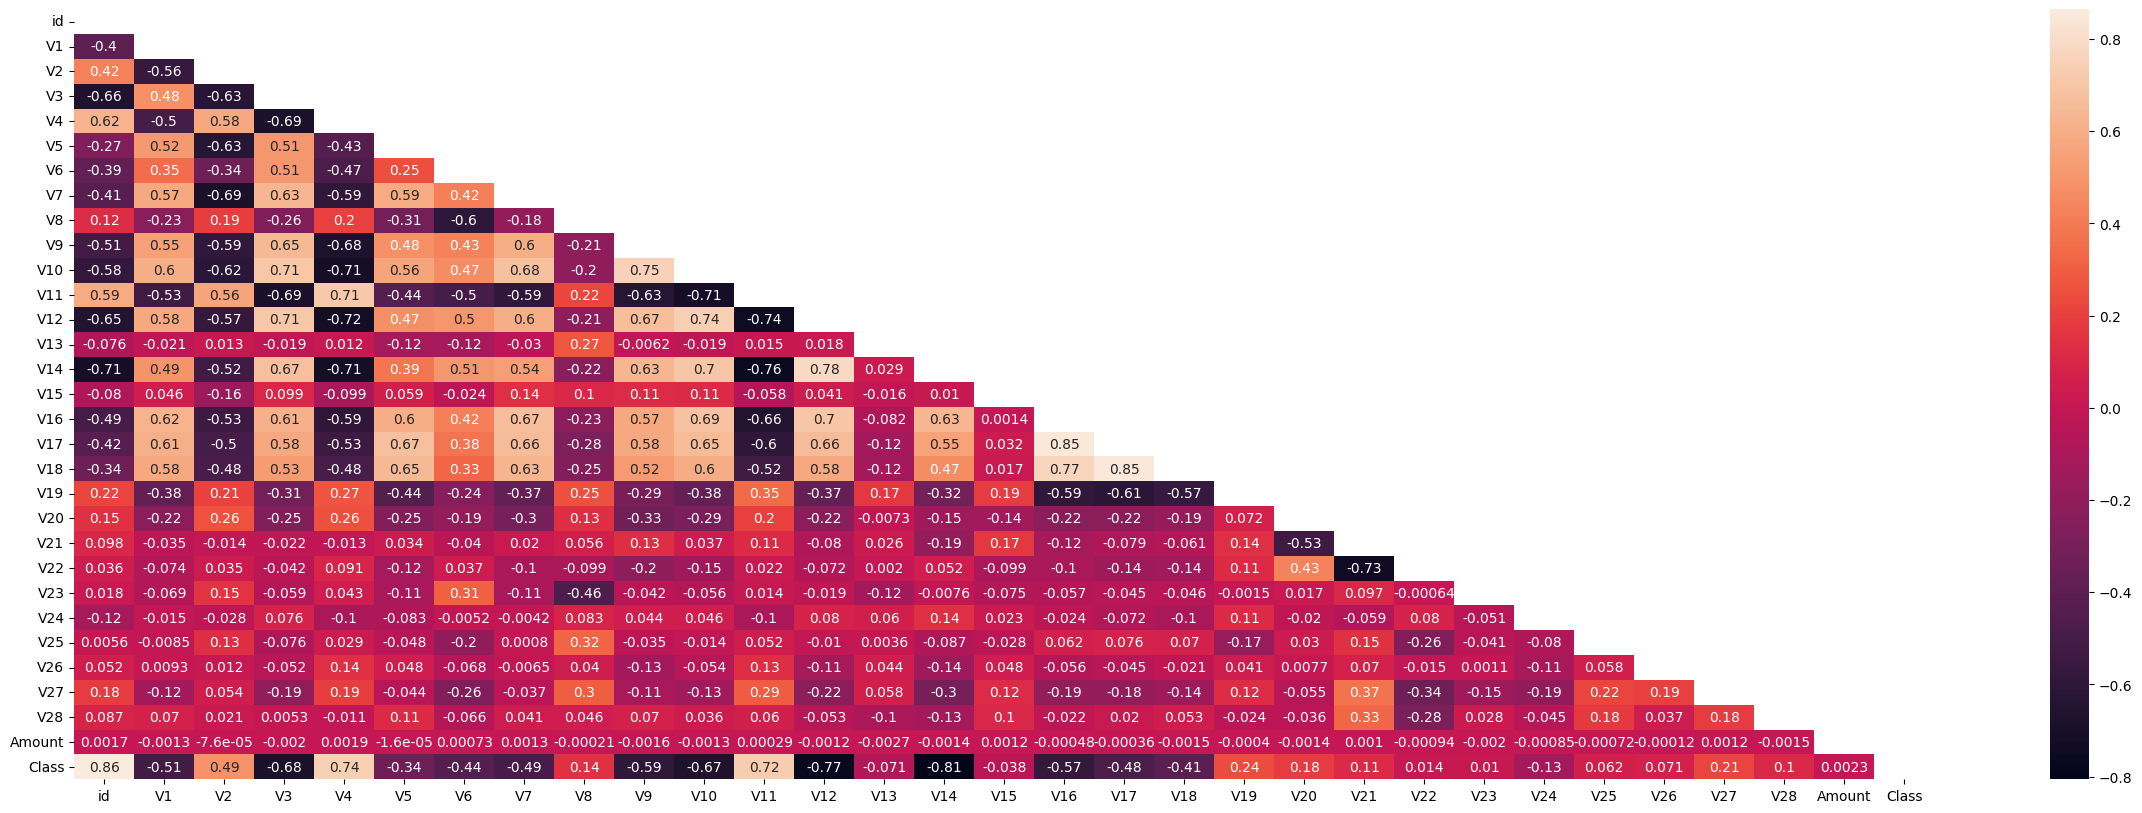

In [93]:
corr_df = df.corr()
mask = np.triu(np.ones_like(corr_df, dtype=bool))
plt.figure(figsize = [30 ,10])
sns.heatmap(corr_df , mask=mask,annot = True)

In [94]:
def generate_corr_mat(df, high=0.7):
    corr_mat = {'highly_corr': dict()}
    cols = df.columns.tolist()
    if 'id' in cols:
        cols.remove('id')

    for i, val in df.iterrows():
        if i != 'id':
            corr_mat['highly_corr'][i] = [col for col in cols if val[col] > high and col != i]

    return corr_mat
generate_corr_mat(corr_df)

{'highly_corr': {'V1': [],
  'V2': [],
  'V3': ['V10', 'V12'],
  'V4': ['V11', 'Class'],
  'V5': [],
  'V6': [],
  'V7': [],
  'V8': [],
  'V9': ['V10'],
  'V10': ['V3', 'V9', 'V12'],
  'V11': ['V4', 'Class'],
  'V12': ['V3', 'V10', 'V14'],
  'V13': [],
  'V14': ['V12'],
  'V15': [],
  'V16': ['V17', 'V18'],
  'V17': ['V16', 'V18'],
  'V18': ['V16', 'V17'],
  'V19': [],
  'V20': [],
  'V21': [],
  'V22': [],
  'V23': [],
  'V24': [],
  'V25': [],
  'V26': [],
  'V27': [],
  'V28': [],
  'Amount': [],
  'Class': ['V4', 'V11']}}

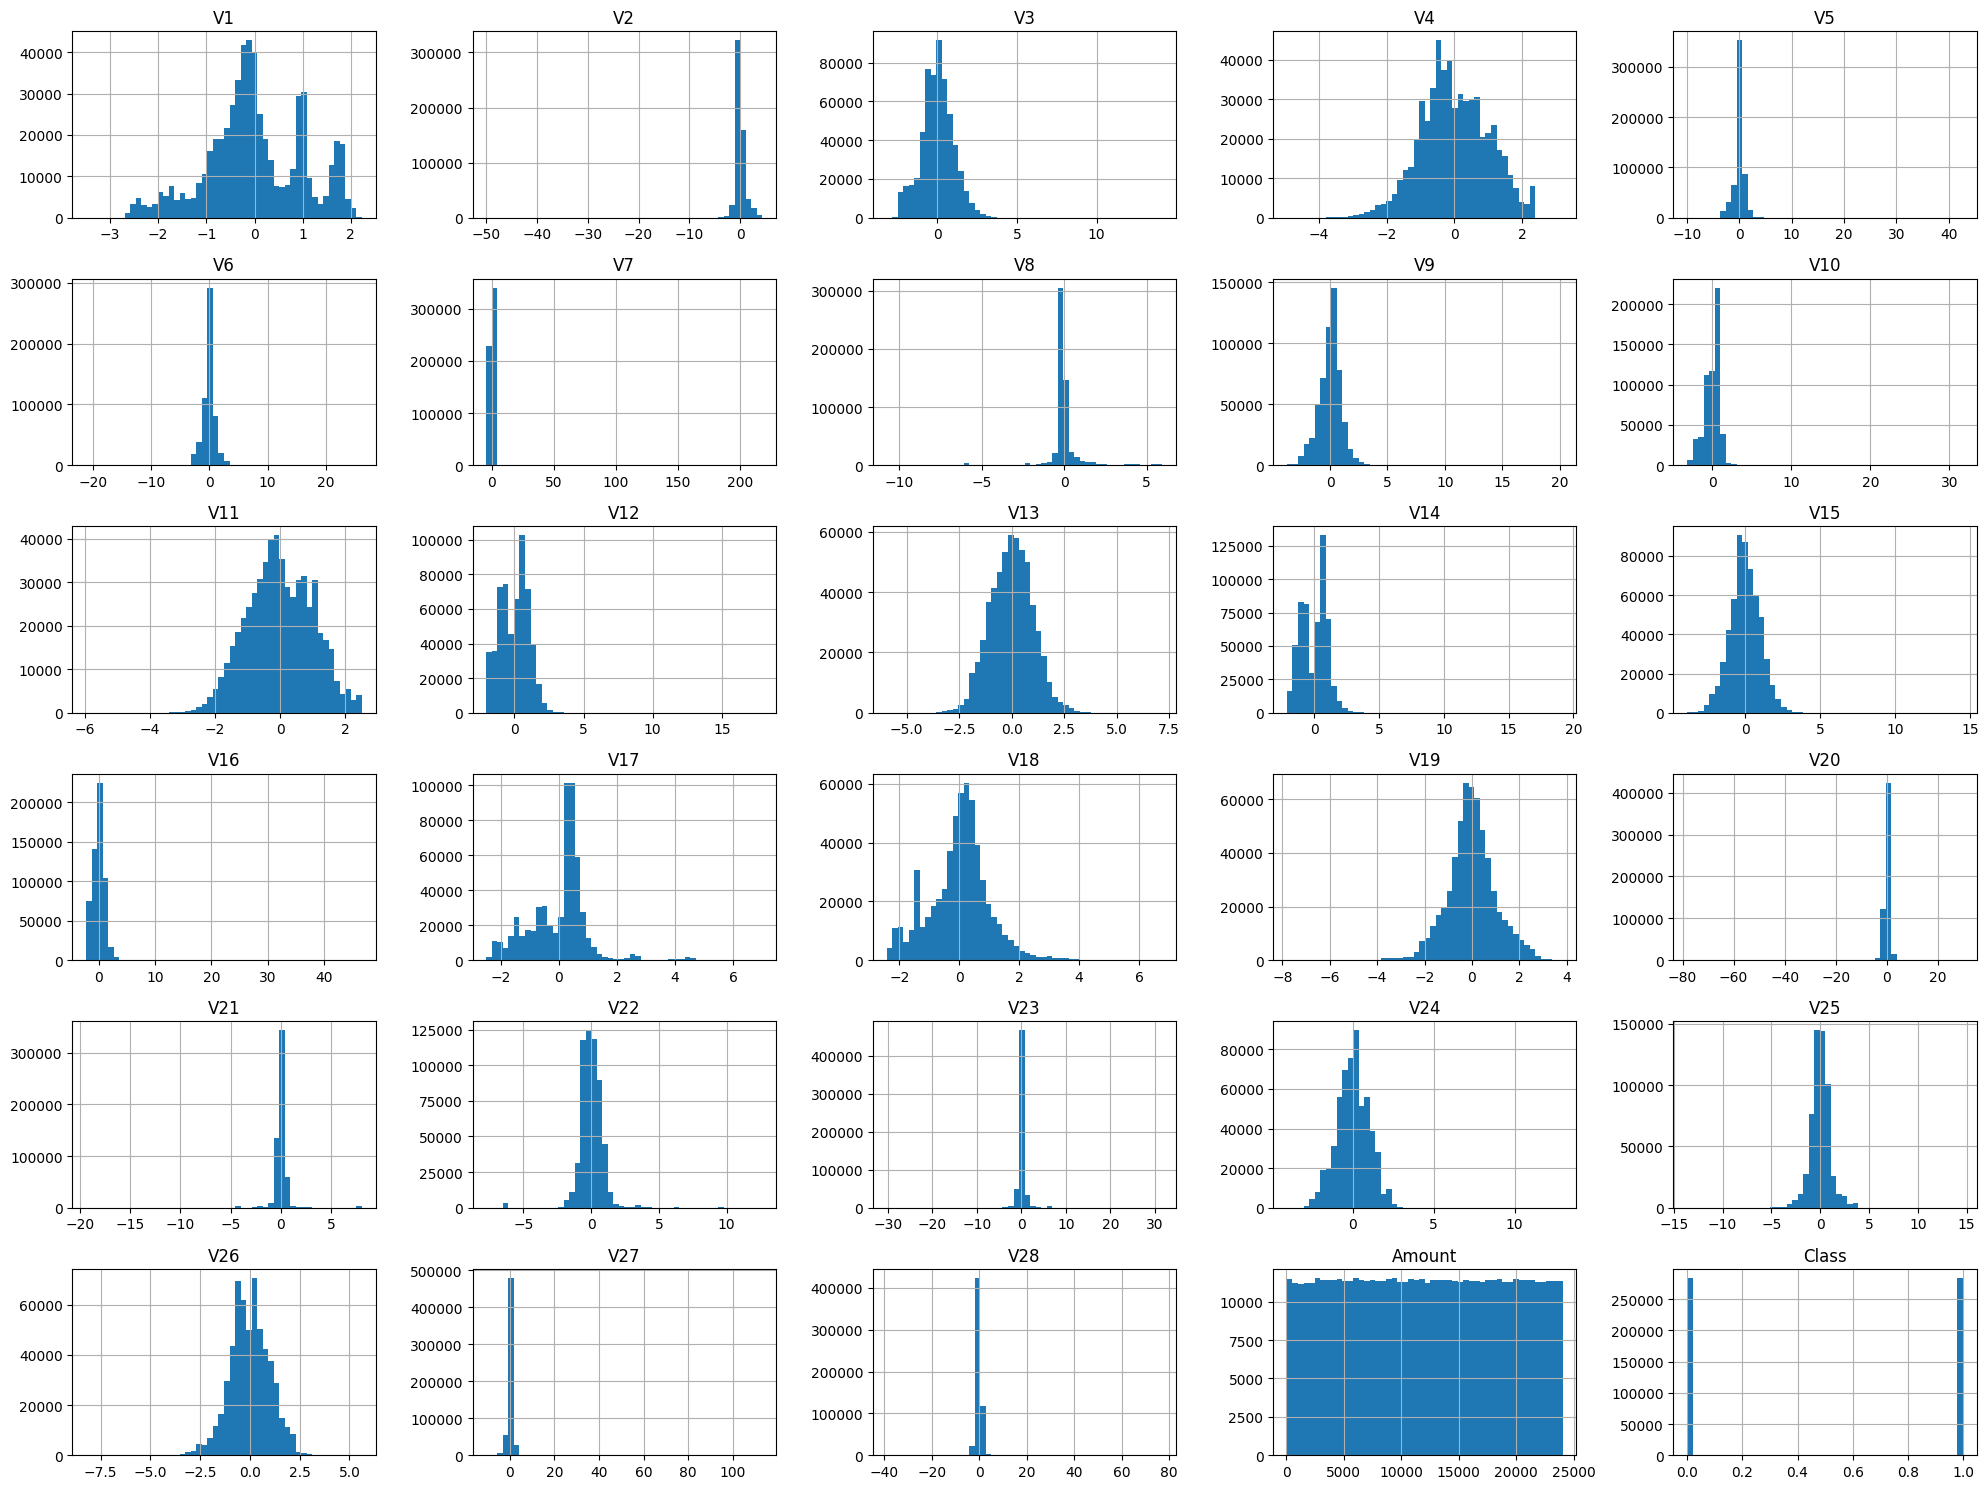

In [95]:
df_temp = df.drop("id" ,axis = 1)

df_temp.hist(bins=50, figsize=(20, 15))
plt.tight_layout()
plt.show()

##### V2 ,V5 ,V7 ,V20 ,V27 ,V28 có độ lệch dữ liệu rất

<Axes: ylabel='Amount'>

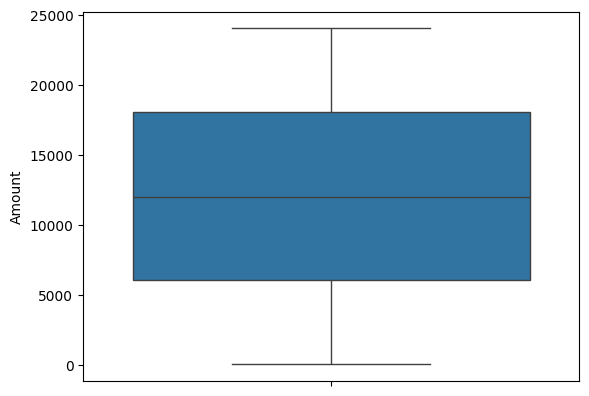

In [96]:
sns.boxplot(data = df["Amount"])

<Axes: xlabel='Class', ylabel='count'>

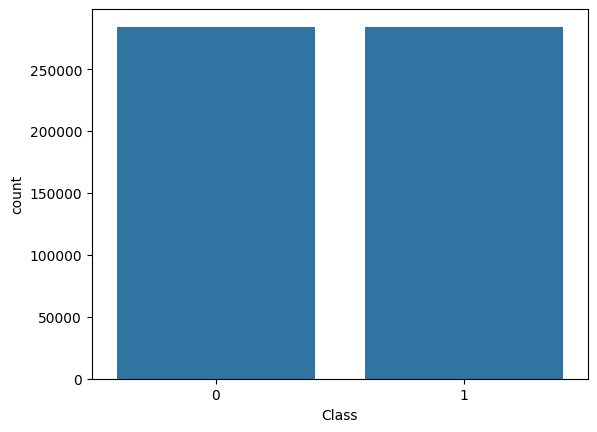

In [97]:
sns.countplot(x='Class', data=df)

### PCA

In [98]:
df_temp = df_temp.drop("Class" ,axis = 1)


In [99]:
df_temp

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,...,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,...,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,...,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,...,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,...,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,-1.161847,...,-0.751011,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16
568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,-0.210817,...,-0.550260,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40
568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,-0.144495,...,-0.076417,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85
568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,-0.080078,...,0.288186,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83


In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [101]:
# Chuẩn hóa dữ liệu
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_temp)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
total_variance_explained = explained_variance.sum()

print(f'Phần trăm dữ liệu đươc dữ lại khi giảm xuống 2 {total_variance_explained * 100:.2f}%')

Phần trăm dữ liệu đươc dữ lại khi giảm xuống 2 43.56%


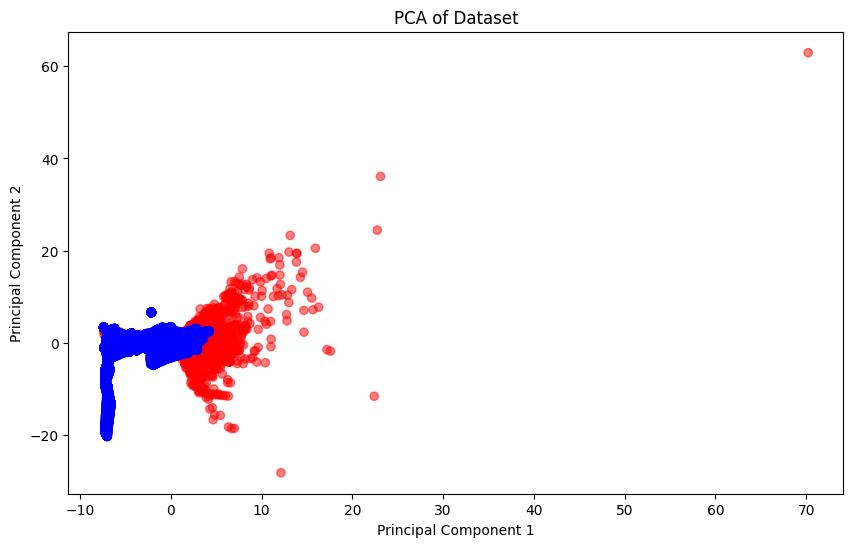

In [102]:
# Tạo DataFrame mới từ kết quả PCA
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['Class'] = df["Class"].values

# Trực quan hóa kết quả
plt.figure(figsize=(10, 6))
colors = {0: 'red', 1: 'blue'}  # Giả sử 'class' chỉ có 2 loại giá trị: 0 và 1
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Class'].map(colors), alpha=0.5)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Dataset')
plt.show()

#### Build model

In [103]:
df

,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,568625,-0.833437,0.061886,-0.899794,0.904227,-1.002401,0.481454,-0.370393,0.189694,-0.938153,...,0.167503,0.419731,1.288249,-0.900861,0.560661,-0.006018,3.308968,0.081564,4394.16,1
568626,568626,-0.670459,-0.202896,-0.068129,-0.267328,-0.133660,0.237148,-0.016935,-0.147733,0.483894,...,0.031874,0.388161,-0.154257,-0.846452,-0.153443,1.961398,-1.528642,1.704306,4653.40,1
568627,568627,-0.311997,-0.004095,0.137526,-0.035893,-0.042291,0.121098,-0.070958,-0.019997,-0.122048,...,0.140788,0.536523,-0.211100,-0.448909,0.540073,-0.755836,-0.487540,-0.268741,23572.85,1
568628,568628,0.636871,-0.516970,-0.300889,-0.144480,0.131042,-0.294148,0.580568,-0.207723,0.893527,...,-0.060381,-0.195609,-0.175488,-0.554643,-0.099669,-1.434931,-0.159269,-0.076251,10160.83,1


In [104]:
X = df.drop(["id" ,"Class"] ,axis = 1)
X = scaler.fit_transform(X)
y = df["Class"]

In [105]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, classification_report ,confusion_matrix


In [106]:
X_train ,X_test ,y_train ,y_test = train_test_split(X, y, test_size=0.25)

In [107]:
def build_model(model ,X_train ,X_test ,y_train ,y_test):
  model.fit(X_train ,y_train)
  y_pred = model.predict(X_test)

  accuracy = accuracy_score(y_test, y_pred)
  f1 = f1_score(y_test, y_pred, average='weighted')
  conf_matrix = confusion_matrix(y_test, y_pred)

  print('Accuracy: ', accuracy)
  print('F1 Score: ', f1)
  print("Confusion Matrix:")
  print(conf_matrix)

  print("Classification Report: ")
  print(classification_report(y_test, y_pred))

In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB


In [109]:
# Khởi tạo mô hình Logistic Regression
logistic_model = LogisticRegression()
# Khởi tạo mô hình Decision Tree
decision_tree_model = DecisionTreeClassifier()
# Khởi tạo mô hình Random Forest
random_forest_model = RandomForestClassifier()
model_gnb = GaussianNB()

In [110]:
build_model(logistic_model ,X_train ,X_test ,y_train ,y_test)

Accuracy:  0.9652428987464652
F1 Score:  0.9652384016361251
Confusion Matrix:
[[69409  1654]
 [ 3287 67808]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.95      0.98      0.97     71063
           1       0.98      0.95      0.96     71095

    accuracy                           0.97    142158
   macro avg       0.97      0.97      0.97    142158
weighted avg       0.97      0.97      0.97    142158



In [111]:
build_model(decision_tree_model ,X_train ,X_test ,y_train ,y_test)

Accuracy:  0.9976645704075747
F1 Score:  0.9976645676964293
Confusion Matrix:
[[70828   235]
 [   97 70998]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71063
           1       1.00      1.00      1.00     71095

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



In [112]:
build_model(random_forest_model ,X_train ,X_test ,y_train ,y_test)

Accuracy:  0.999831173764403
F1 Score:  0.9998311737531752
Confusion Matrix:
[[71039    24]
 [    0 71095]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71063
           1       1.00      1.00      1.00     71095

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



In [113]:
build_model(model_gnb ,X_train ,X_test ,y_train ,y_test)

Accuracy:  0.9194769200467086
F1 Score:  0.9191888955222209
Confusion Matrix:
[[69591  1472]
 [ 9975 61120]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.98      0.92     71063
           1       0.98      0.86      0.91     71095

    accuracy                           0.92    142158
   macro avg       0.93      0.92      0.92    142158
weighted avg       0.93      0.92      0.92    142158



##### Ở đây ta thấy mô hình randomforest rất lâu nhưng có độ chính xác gần như tuyệt đối ,decision tree có độ chính xác cũng gần như tuyệt đối và tốc độ nhanh hơn hẳn randomforest
##### Gaussian và logistic regression có độ chính xác thấp hơn nhưng cũng rất cao
##### Giải thích các mô hình này đạt được cao như vậy do tập dữ liệu đầu vào đã quá tốt ,đã được chuẩn hóa